# Covid 19 Data Analysis
- **Created by Andrés Segura Tinoco**
- **Created on Apr 27, 2020**

## 1. Read C19 data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Reading data from CSV file
dataURL = "../data/country_info.csv"
countries = pd.read_csv(dataURL)

dataURL = "../data/current_data.csv"
raw_data = pd.read_csv(dataURL, usecols = lambda column : column not in ["row_index", "date", "datestamp"])

In [4]:
# Show first 10 rows of header dataframe
countries.head(10)

,country,full_name,url,capital,region,sub_region,area,population
0,Afghanistan,Afghanistan,country/afghanistan/,Kabul,Asia,Southern Asia,652230.0,27657145
1,Albania,Albania,country/albania/,Tirana,Europe,Southern Europe,28748.0,2886026
2,Algeria,Algeria,country/algeria/,Algiers,Africa,Northern Africa,2381741.0,40400000
3,Andorra,Andorra,country/andorra/,Andorra la Vella,Europe,Southern Europe,468.0,78014
4,Angola,Angola,country/angola/,Luanda,Africa,Middle Africa,1246700.0,25868000
5,Anguilla,Anguilla,country/anguilla/,The Valley,Americas,Caribbean,91.0,13452
6,Antigua and Barbuda,Antigua and Barbuda,country/antigua-and-barbuda/,Saint John's,Americas,Caribbean,442.0,86295
7,Argentina,Argentina,country/argentina/,Buenos Aires,Americas,South America,2780400.0,43590400
8,Armenia,Armenia,country/armenia/,Yerevan,Asia,Western Asia,29743.0,2994400
9,Aruba,Aruba,country/aruba/,Oranjestad,Americas,Caribbean,180.0,107394


In [5]:
# Show first 10 rows of header dataframe
region = "Europe"
america_list = list(countries[countries["region"] == region]["country"])
len(america_list)

49

In [6]:
raw_data = raw_data[raw_data["country"].isin(america_list)]
raw_data = raw_data.reset_index(drop=True)
raw_data.head(10)

,country,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,Italy,207428,28236,78249,100943,1578,3419.21,465.44,2053425,33848.29
1,UK,177454,27510,-1,149600,1559,2725.45,422.52,1023824,15724.53
2,Spain,242988,24824,142450,75714,2500,5232.48,534.56,1528833,32921.73
3,France,167346,24594,50212,92540,3878,2508.56,368.67,724574,10861.55
4,Belgium,49032,7703,11892,29437,740,4331.64,680.51,253198,22368.28
5,Germany,163759,6662,126900,30197,2189,2002.66,81.47,2547052,31148.64
6,Netherlands,39791,4893,-1,34648,735,2337.92,287.49,225899,13272.72
7,Sweden,21520,2653,1005,17862,531,2174.86,268.12,119500,12076.94
8,Switzerland,29705,1754,23400,4551,167,3561.07,210.27,271500,32547.71
9,Ireland,20833,1265,13386,6182,123,3266.38,198.34,153954,24138.29


In [7]:
# Create numerical dataset
dataset = raw_data.drop(columns=["country"])
col_list = dataset.columns

## 2. Data Quality process with Standardization

In [8]:
# Filter data
min_deaths = 200
x = dataset.loc[dataset['total_deaths'] >= min_deaths]
len(x)

21

In [9]:
# Standardize the Data
x = StandardScaler().fit_transform(x)

# Show skills data in temporary dataframe
norm_data = pd.DataFrame(data = x, columns = col_list)
norm_data.head()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,1.875779,2.208768,1.344436,1.598079,0.709365,1.020446,1.414757,1.430421,1.096240
1,1.483718,2.135078,-0.585374,2.755858,0.691388,0.506946,1.195191,0.340890,-0.591058
2,2.340905,1.862444,2.927767,0.997762,1.581687,2.362571,1.768355,0.875294,1.009978
3,1.351505,1.839099,0.652984,1.398132,2.885440,0.346411,0.919710,0.024221,-1.043795
4,-0.196045,0.124634,-0.292067,-0.103386,-0.083484,1.695798,2.514994,-0.474592,0.027466


## 3. Correlation matrix between Countries

In [10]:
# Calculate skills correlations
corr = norm_data.corr()
corr

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
total_cases,1.000000,0.896416,0.793807,0.842642,0.864747,0.565538,0.605966,0.699575,0.227500
total_deaths,0.896416,1.000000,0.570530,0.845048,0.737711,0.596206,0.746692,0.373620,0.077419
total_recovered,0.793807,0.570530,1.000000,0.345883,0.654568,0.534636,0.392587,0.568794,0.377270
active_cases,0.842642,0.845048,0.345883,1.000000,0.768386,0.372946,0.547916,0.636276,0.032174
serious_critical,0.864747,0.737711,0.654568,0.768386,1.000000,0.377662,0.469052,0.671761,0.025452
tot_cases_1m_pop,0.565538,0.596206,0.534636,0.372946,0.377662,1.000000,0.862189,0.131695,0.483292
deaths_1m_pop,0.605966,0.746692,0.392587,0.547916,0.469052,0.862189,1.000000,0.100576,0.118446
total_tests,0.699575,0.373620,0.568794,0.636276,0.671761,0.131695,0.100576,1.000000,0.304068
tests_1m_pop,0.227500,0.077419,0.377270,0.032174,0.025452,0.483292,0.118446,0.304068,1.000000


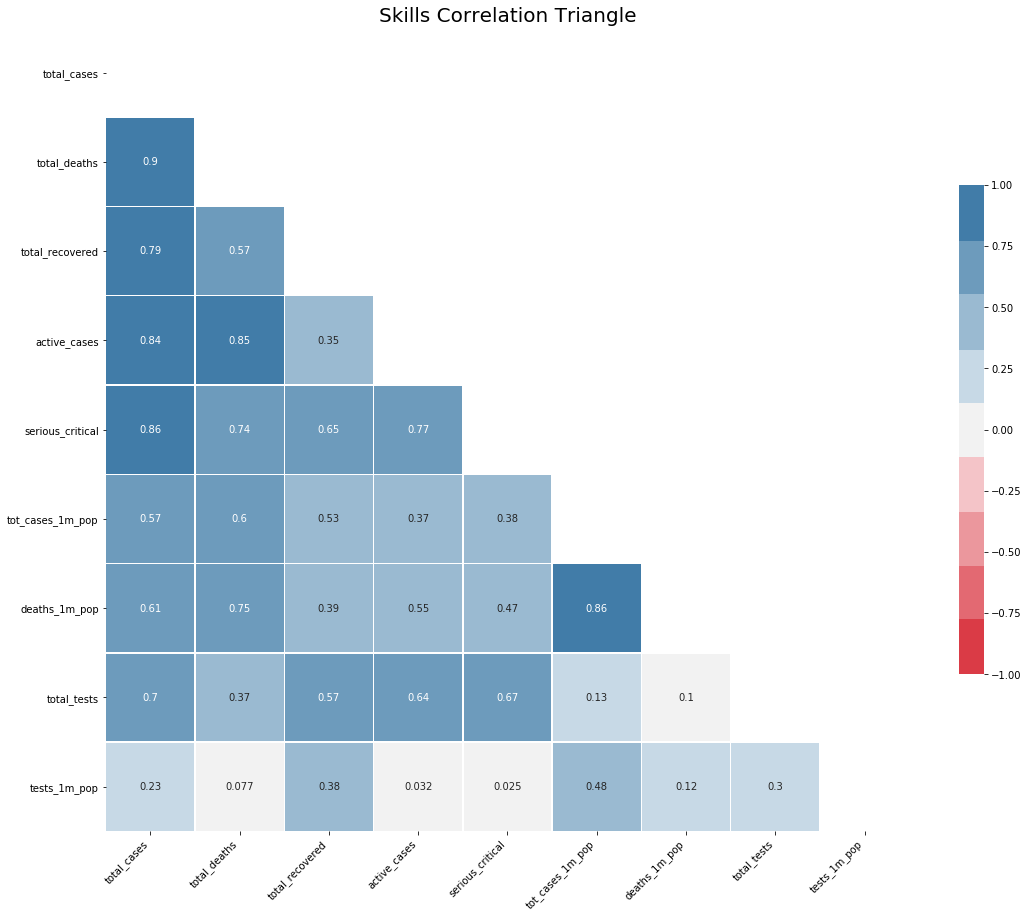

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot=True)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Skills Correlation Triangle", fontsize = 20)
plt.show()

## 4. PCA Process

In [12]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)
len(pca_data)

21

In [13]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, raw_data["country"]], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,country
0,4.246638,-0.252964,0.294294,0.535818,-0.612624,Italy
1,3.079666,0.687637,-2.079598,1.543444,-0.683648,UK
2,5.287991,-1.267355,0.579172,-1.213040,-0.162435,Spain
3,3.362312,1.171563,-1.704388,-0.687684,-0.205013,France
4,0.971937,-2.275925,-1.279678,0.208850,1.238138,Belgium
5,2.332831,1.116299,2.450088,-1.385481,0.175265,Germany
6,-0.437593,-0.243601,-1.113958,0.023576,0.449270,Netherlands
7,-0.950166,-0.321750,-1.037046,-0.228105,0.529815,Sweden
8,-0.499346,-1.683437,0.677704,0.092699,0.216647,Switzerland
9,-0.870133,-1.274209,0.053311,-0.055720,0.349009,Ireland


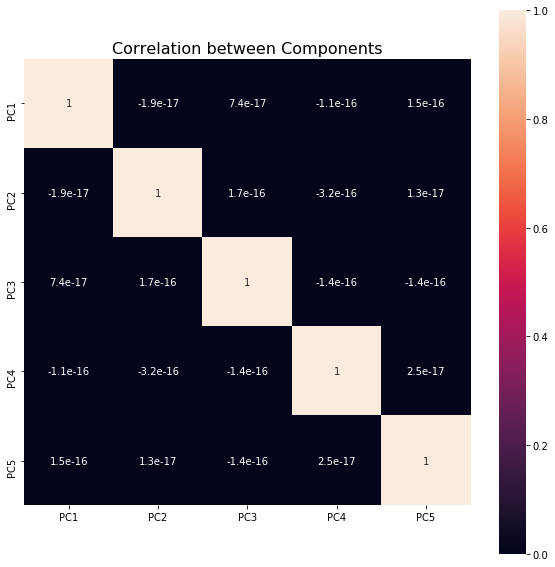

In [14]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 5. PCA Variance Ratio

In [15]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.5893297149771557,
 0.1589330887780498,
 0.14024069354217747,
 0.060186227119527806,
 0.027872650877669148]

In [16]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

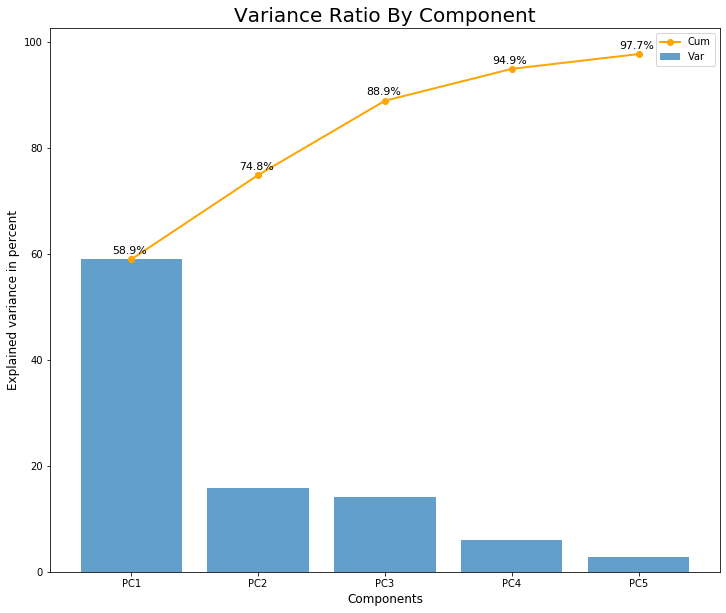

In [17]:
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

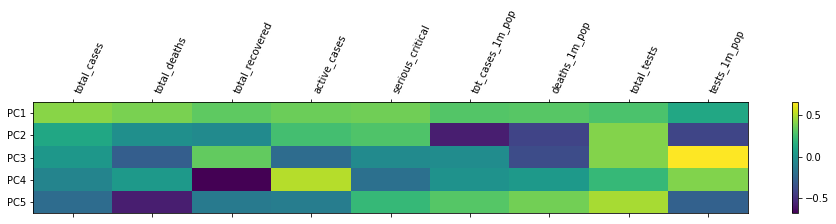

In [18]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(col_list)), col_list, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. 2D Chart - The first 2 components

In [19]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

74.82628037552055

In [20]:
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [21]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

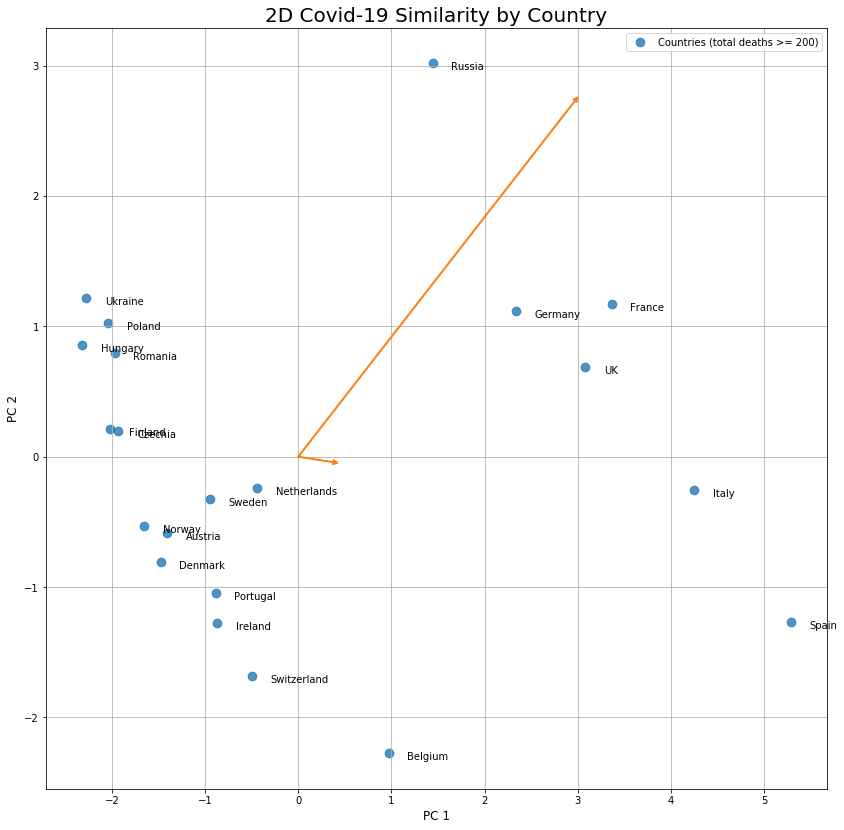

In [22]:
fig, ax3 = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.regplot(ax = ax3, data = df_pca, x = "PC1", y = "PC2", fit_reg = False
                   , marker = "o", color = "#1f77b4", scatter_kws = {"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.country[ix], 
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D Covid-19 Similarity by Country", fontsize = 20)
ax3.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax3.grid()

### 6.2. 3D Chart - The first 3 components

In [23]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

88.8503497297383

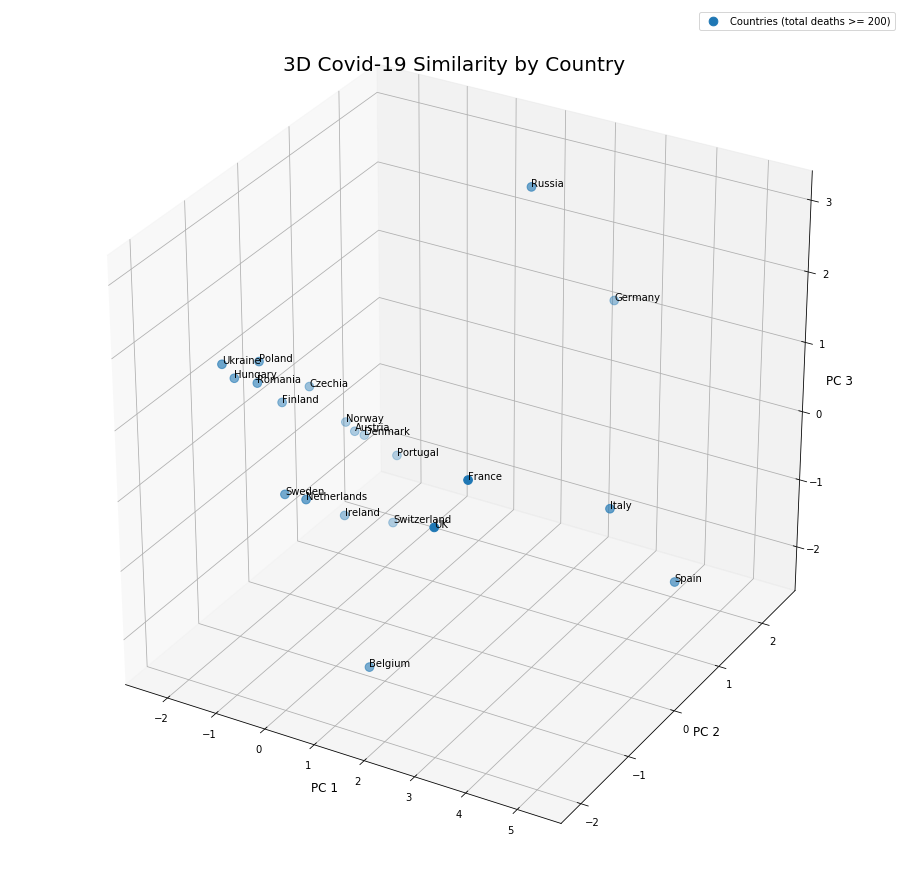

In [24]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
zz = df_pca.loc[:,["PC2"]].values
yy = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.country[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D Covid-19 Similarity by Country", fontsize = 20)
ax4.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax4.grid()

## 7. Analysis of Similarity

### 7.1. Transpose the matrix by Countries

In [25]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,4.246638,-0.252964,0.294294,0.535818,-0.612624,Italy
1,3.079666,0.687637,-2.079598,1.543444,-0.683648,UK
2,5.287991,-1.267355,0.579172,-1.213040,-0.162435,Spain
3,3.362312,1.171563,-1.704388,-0.687684,-0.205013,France
4,0.971937,-2.275925,-1.279678,0.208850,1.238138,Belgium


In [26]:
# Transpose the matrix
df_temp = df_pca.copy()
df_trans = df_temp.drop(['country'], axis = 1).T
df_trans.columns = list(df_temp['country'])
df_trans.head()

,Italy,UK,Spain,France,Belgium,Germany,Netherlands,Sweden,Switzerland,Ireland,...,Portugal,Romania,Poland,Austria,Denmark,Hungary,Ukraine,Czechia,Finland,Norway
PC1,4.246638,3.079666,5.287991,3.362312,0.971937,2.332831,-0.437593,-0.950166,-0.499346,-0.870133,...,-0.887095,-1.966965,-2.040267,-1.403168,-1.475944,-2.319622,-2.271828,-1.928122,-2.018219,-1.653753
PC2,-0.252964,0.687637,-1.267355,1.171563,-2.275925,1.116299,-0.243601,-0.321750,-1.683437,-1.274209,...,-1.048200,0.795140,1.024156,-0.583228,-0.810524,0.857993,1.217719,0.195105,0.210624,-0.533822
PC3,0.294294,-2.079598,0.579172,-1.704388,-1.279678,2.450088,-1.113958,-1.037046,0.677704,0.053311,...,1.156153,-0.570322,-0.459219,0.799064,1.064649,-0.680876,-0.949155,0.405280,-0.053294,0.861646
PC4,0.535818,1.543444,-1.213040,-0.687684,0.208850,-1.385481,0.023576,-0.228105,0.092699,-0.055720,...,0.957705,-0.509785,-0.429350,0.124877,0.467901,-0.554499,-0.692511,0.064825,-0.207281,0.516480
PC5,-0.612624,-0.683648,-0.162435,-0.205013,1.238138,0.175265,0.449270,0.529815,0.216647,0.349009,...,-0.286643,-0.070680,-0.104071,-0.275042,-0.430196,-0.139003,-0.073060,-0.387029,-0.229743,-0.458851


### 7.2. Calculate Pearson correlation matrix

In [27]:
# Calculate the correlation matrix
corr = df_trans.corr(method = 'pearson')
corr.iloc[:10, :10]

,Italy,UK,Spain,France,Belgium,Germany,Netherlands,Sweden,Switzerland,Ireland
Italy,1.000000,0.731951,0.929175,0.757417,0.393433,0.443022,-0.280772,-0.607721,-0.080241,-0.390933
UK,0.731951,1.000000,0.501468,0.820910,0.345646,-0.140590,0.261042,-0.135206,-0.483386,-0.566387
Spain,0.929175,0.501468,1.000000,0.703616,0.463391,0.632867,-0.302495,-0.543410,0.051641,-0.241603
France,0.757417,0.820910,0.703616,1.000000,0.239346,0.325084,0.120153,-0.196907,-0.624325,-0.719468
Belgium,0.393433,0.345646,0.463391,0.239346,1.000000,-0.250393,0.519521,0.336967,0.454873,0.485861
Germany,0.443022,-0.140590,0.632867,0.325084,-0.250393,1.000000,-0.737220,-0.695965,-0.060563,-0.342836
Netherlands,-0.280772,0.261042,-0.302495,0.120153,0.519521,-0.737220,1.000000,0.918776,-0.162563,0.197080
Sweden,-0.607721,-0.135206,-0.543410,-0.196907,0.336967,-0.695965,0.918776,1.000000,-0.031665,0.379813
Switzerland,-0.080241,-0.483386,0.051641,-0.624325,0.454873,-0.060563,-0.162563,-0.031665,1.000000,0.908486
Ireland,-0.390933,-0.566387,-0.241603,-0.719468,0.485861,-0.342836,0.197080,0.379813,0.908486,1.000000


### 7.3. Plot the correlation triangle

In [28]:
# Create Players Correlation Triangle plot
def plotCorrTriangle(corr):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (16, 16))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 240, n=9)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

    # Add title
    ax.set_title("Correlation Triangle between Countries", fontsize = 20)

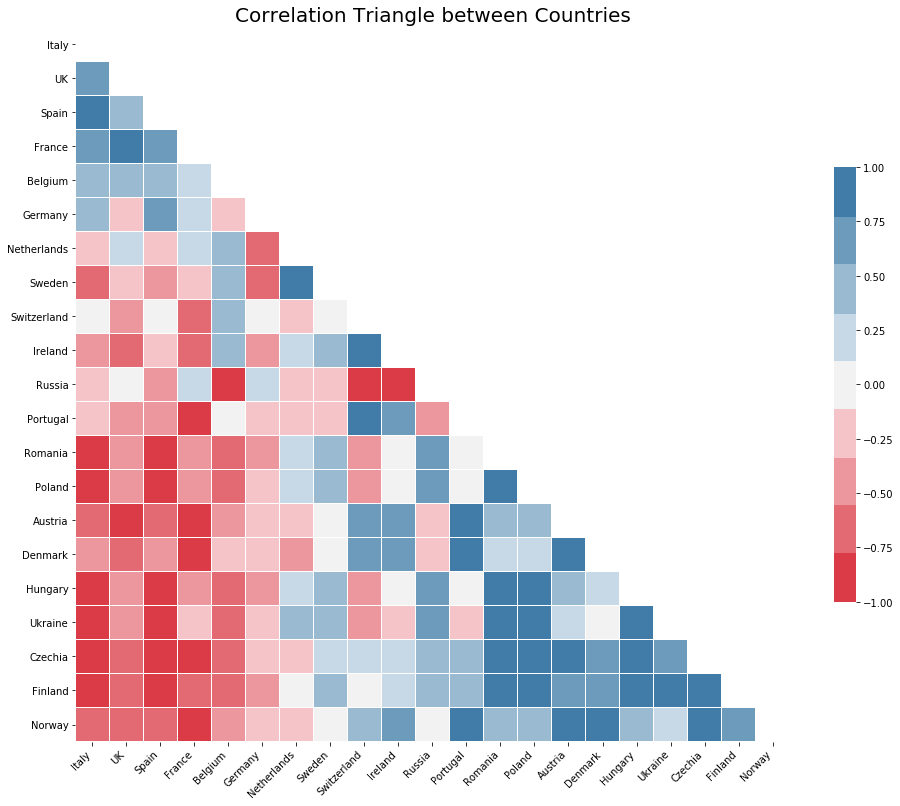

In [29]:
# Plot Correlation Triangle
plotCorrTriangle(corr)

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>